In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!unzip *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


# Importing Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn import  metrics

%matplotlib inline

**Checking our data**

In [6]:
dataframe = pd.read_csv('abalone.csv')
dataframe.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**Descriptive Statistics**

In [7]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


**Label Encoding of Categorical Values**

In [8]:
le=LabelEncoder()
dataframe['Sex']=le.fit_transform(dataframe['Sex'])

In [9]:
dataframe

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Data Visualisation

**Checking for nulls using Missingno**



In [10]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import missingno as msno

**Plotting a Bar Chart of the Missing Values**

<AxesSubplot:>

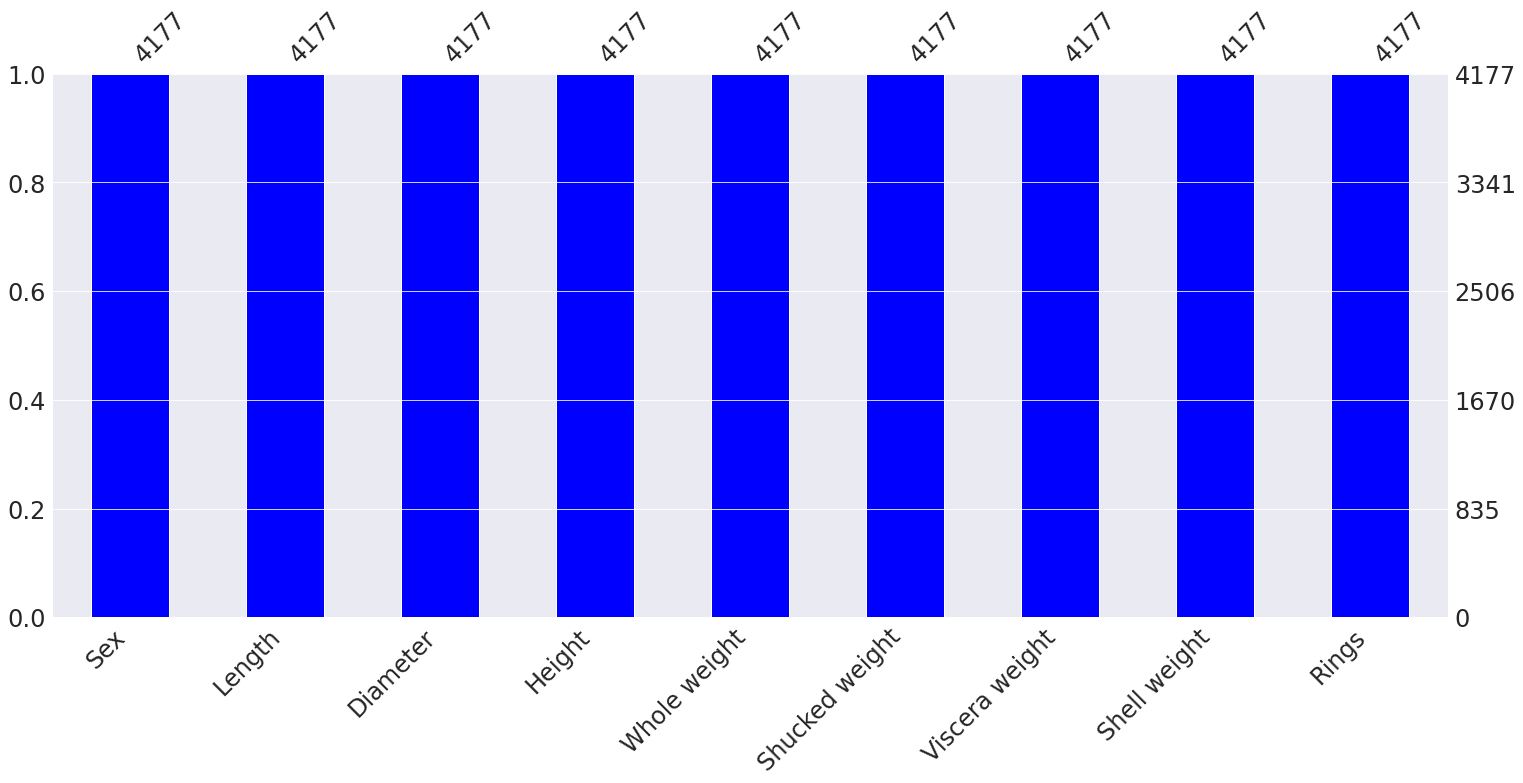

In [12]:
msno.bar(dataframe,fontsize = 24, color = 'blue')

**Heatmap of missing values**

/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

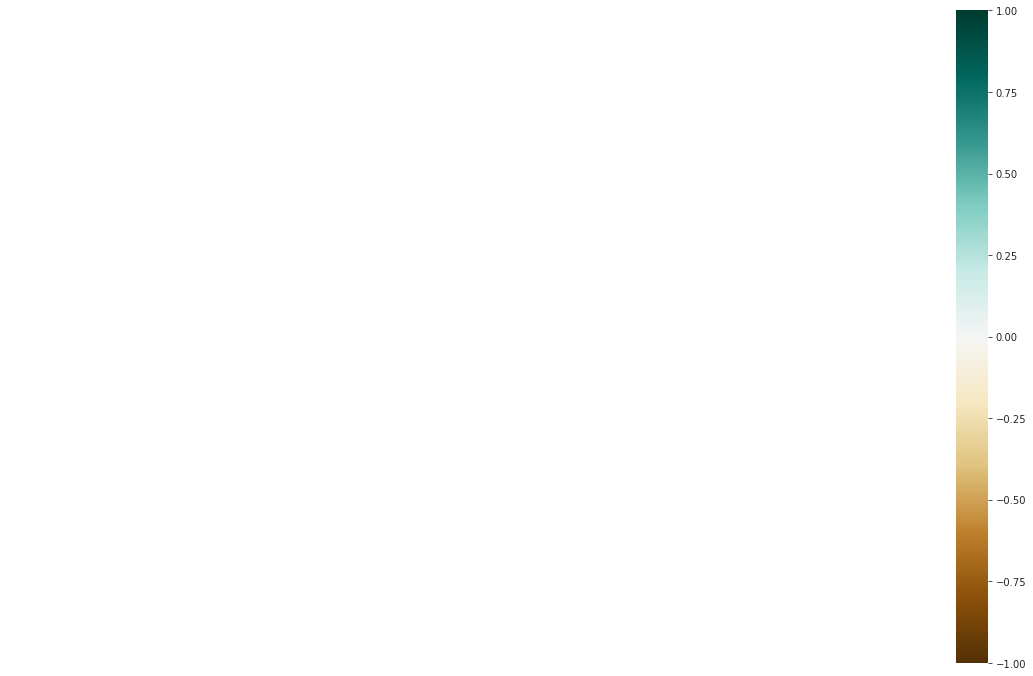

In [13]:
msno.heatmap(dataframe,fontsize = 24, cmap = 'BrBG')

**Hence we conclude that there are no missing values in our dataset**

**Displot for Target**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rings', ylabel='Density'>

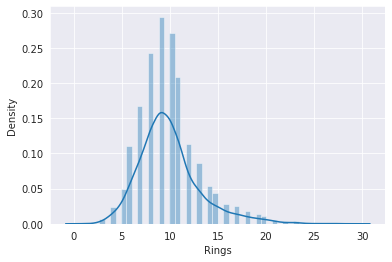

In [14]:
sns.distplot(dataframe['Rings'])

**Correlation Heatmap of Variables**



In [15]:
corr=dataframe.corr()
print(corr)

                     Sex    Length  Diameter    Height  Whole weight  \
Sex             1.000000 -0.036066 -0.038874 -0.042077     -0.021391   
Length         -0.036066  1.000000  0.986812  0.827554      0.925261   
Diameter       -0.038874  0.986812  1.000000  0.833684      0.925452   
Height         -0.042077  0.827554  0.833684  1.000000      0.819221   
Whole weight   -0.021391  0.925261  0.925452  0.819221      1.000000   
Shucked weight -0.001373  0.897914  0.893162  0.774972      0.969405   
Viscera weight -0.032067  0.903018  0.899724  0.798319      0.966375   
Shell weight   -0.034854  0.897706  0.905330  0.817338      0.955355   
Rings          -0.034627  0.556720  0.574660  0.557467      0.540390   

                Shucked weight  Viscera weight  Shell weight     Rings  
Sex                  -0.001373       -0.032067     -0.034854 -0.034627  
Length                0.897914        0.903018      0.897706  0.556720  
Diameter              0.893162        0.899724      0.905330

<AxesSubplot:>

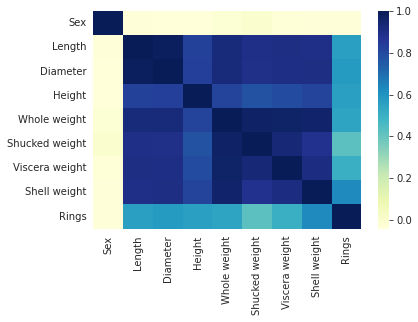

In [16]:
sns.heatmap(corr,cmap = 'YlGnBu')

**Maximum Heights**

<AxesSubplot:xlabel='count', ylabel='Height'>

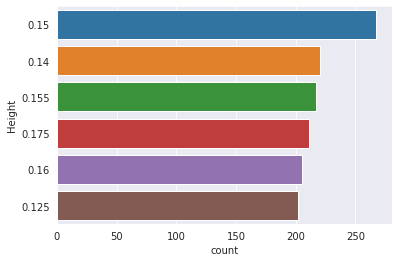

In [17]:
sns.countplot(y=dataframe['Height'],order=dataframe['Height'].value_counts().head(6).index)

**Displot for Height**


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

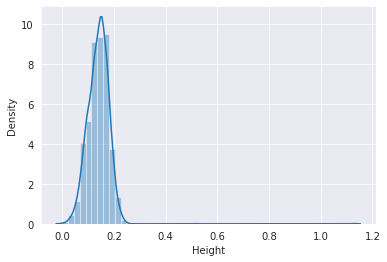

In [18]:
sns.distplot(dataframe['Height'])

**Breaking down into X and y**

In [19]:
X = dataframe.iloc[:, :-1].values
y = dataframe.iloc[:, -1].values

**Creating Training and Validation sets**

In [20]:
train_X,val_X,train_y,val_y = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
print("Shape of Training X :",train_X.shape)
print("Shape of Validation X :",val_X.shape)

Shape of Training X : (3341, 8)
Shape of Validation X : (836, 8)


In [22]:
print("Shape of Training y :",train_y.shape)
print("Shape of Validation y :",val_y.shape)

Shape of Training y : (3341,)
Shape of Validation y : (836,)


# Model Building


**Linear Regression**

In [23]:
lr = LinearRegression()
lr.fit(train_X,train_y)
print('Attempting to fit Linear Regressor')

Attempting to fit Linear Regressor


In [24]:
%%time
y_pred_val_lr = lr.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_lr))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_lr))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_lr)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lr))
print("\n")

MAE on Validation set : 1.6130841939880156


MSE on Validation set : 5.104186010193352


RMSE on Validation set : 1.270072515247856


R2 Score on Validation set : 0.5300147524184923


CPU times: user 6.88 ms, sys: 975 µs, total: 7.86 ms
Wall time: 7.86 ms


**Support Vector Regressor**

In [26]:
svm = SVR()
svm.fit(train_X,train_y)
print('Attempting to fit Support Vector Regressor')

Attempting to fit Support Vector Regressor


In [27]:
%%time
y_pred_val_svm = svm.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_svm))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_svm))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_svm)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_svm))
print("\n")

MAE on Validation set : 1.556016155671517


MSE on Validation set : 5.510122063372042


RMSE on Validation set : 1.247403766096414


R2 Score on Validation set : 0.4926368128068793


CPU times: user 279 ms, sys: 0 ns, total: 279 ms
Wall time: 311 ms


**Decision Tree Regressor**

In [28]:
dc = DecisionTreeRegressor(random_state = 0)
dc.fit(train_X,train_y)
print('Attempting to fit Decision Tree Regressor')

Attempting to fit Decision Tree Regressor


In [29]:
%%time
y_pred_val_dc = dc.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_dc))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_dc))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_dc)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_dc))
print("\n")

MAE on Validation set : 2.0586124401913874


MSE on Validation set : 8.886363636363637


RMSE on Validation set : 1.4347865486515363


R2 Score on Validation set : 0.18175791293752985


CPU times: user 8.96 ms, sys: 0 ns, total: 8.96 ms
Wall time: 13.8 ms


**Random Forest Regressor**

In [30]:
rf = RandomForestRegressor()
rf.fit(train_X,train_y)
print('Attempting to fit Random Forest Regressor')

Attempting to fit Random Forest Regressor


In [31]:
%%time
y_pred_val_rf = rf.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_rf))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_rf))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_rf)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_rf))
print("\n")

MAE on Validation set : 1.5359688995215313


MSE on Validation set : 4.623148205741627


RMSE on Validation set : 1.2393421236775304


R2 Score on Validation set : 0.5743079406310325


CPU times: user 39.6 ms, sys: 1.04 ms, total: 40.7 ms
Wall time: 39.8 ms


**MLP Regressor**

In [32]:
mlp = MLPRegressor(max_iter = 300)
mlp.fit(train_X,train_y)
print('Attempting to fit MLP Regressor')

Attempting to fit MLP Regressor


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
%%time
y_pred_val_mlp = mlp.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_mlp))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_mlp))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_mlp)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_mlp))
print("\n")

MAE on Validation set : 1.540664910868276


MSE on Validation set : 4.759659411272453


RMSE on Validation set : 1.2412352359114995


R2 Score on Validation set : 0.5617382081406946


CPU times: user 7.77 ms, sys: 5.65 ms, total: 13.4 ms
Wall time: 7.96 ms


**Gradient Boosting Regressor**

In [34]:
gbc = GradientBoostingRegressor()
gbc.fit(train_X,train_y)
print('Attempting to fit Gradient Boosting Regressor')

Attempting to fit Gradient Boosting Regressor


In [35]:
%%time
y_pred_val_gbc = gbc.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_gbc))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_gbc))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_gbc)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_gbc))
print("\n")

MAE on Validation set : 1.5247813855559167


MSE on Validation set : 4.698290274846948


RMSE on Validation set : 1.234820385949275


R2 Score on Validation set : 0.5673889796288818


CPU times: user 9.98 ms, sys: 1.27 ms, total: 11.2 ms
Wall time: 15.3 ms


**Light GBM Regressor**

In [36]:
lgbm = LGBMRegressor()
lgbm.fit(train_X,train_y)
print('Attempting to fit Light GBM Regressor')

Attempting to fit Light GBM Regressor


In [37]:
%%time
y_pred_val_lgbm = lgbm.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_lgbm))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_lgbm))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_lgbm)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lgbm))
print("\n")

MAE on Validation set : 1.5379989375398153


MSE on Validation set : 4.907277601641163


RMSE on Validation set : 1.2401608514784748


R2 Score on Validation set : 0.5481457623306438


CPU times: user 28.7 ms, sys: 1.83 ms, total: 30.5 ms
Wall time: 20.3 ms


**Overview(R2 Scores) of all Models**

In [38]:
print('Logistic Regression R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lr))
print('SVR R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_svm))
print('Decision Tree Regressor R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_dc))
print('Random Forest Regressor R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_rf))
print('MLP Regressor R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_mlp))
print('Gradient Boosting R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_gbc))
print('Light GBM R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lgbm))

Logistic Regression R2 Score on Validation set : 0.5300147524184923
SVR R2 Score on Validation set : 0.4926368128068793
Decision Tree Regressor R2 Score on Validation set : 0.18175791293752985
Random Forest Regressor R2 Score on Validation set : 0.5743079406310325
MLP Regressor R2 Score on Validation set : 0.5617382081406946
Gradient Boosting R2 Score on Validation set : 0.5673889796288818
Light GBM R2 Score on Validation set : 0.5481457623306438


**As we can see our top 3 Models(On the basis of R2 score) are -**

1. Random Forest Regressor

2. Gradient Boosting Regressor

3. MLP Regressor